카테고리별 개수 비교 막대그래프

1. Please upload your 'receipts.csv' file.


Saving receipts.csv to receipts (11).csv

File 'receipts (11).csv' loaded successfully.

Generating graph...


/tmp/ipython-input-2072377266.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count_data.index, y=count_data.values, palette='viridis')


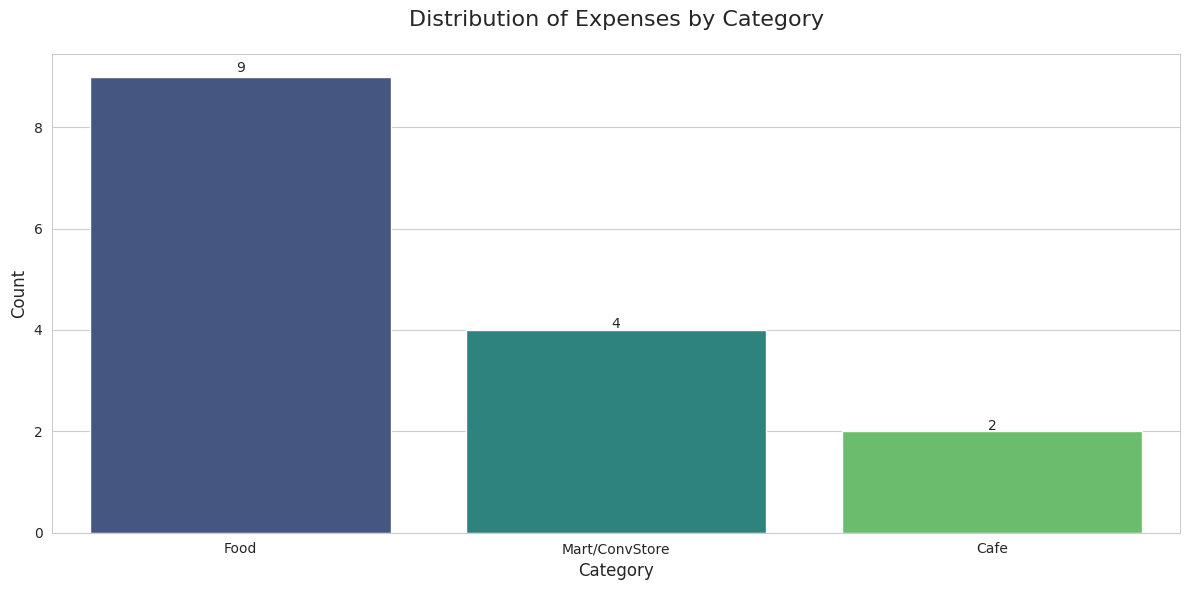


Done! '식비' and '식당' are merged into 'Food'.


In [10]:
# -*- coding: utf-8 -*-

"""
[Machine Learning Assignment - Final English Version]
* Description:
  - Translates '식비' and '식당' both to 'Food'.
  - Handles all Korean text to avoid font errors.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# ==========================================
# 1. File Upload
# ==========================================
print("1. Please upload your 'receipts.csv' file.")
from google.colab import files
uploaded = files.upload()

if len(uploaded.keys()) > 0:
    filename = list(uploaded.keys())[0]
    print(f"\nFile '{filename}' loaded successfully.")
else:
    print("No file uploaded. Please run the code again.")
    filename = None

# ==========================================
# 2. Data Loading & Translation
# ==========================================
if filename:
    # Attempt to read CSV with correct encoding
    try:
        df = pd.read_csv(filename, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(filename, encoding='cp949')

    # Strip whitespace from column names and data
    df.columns = df.columns.str.strip()

    if 'username' in df.columns:
        df['username'] = df['username'].astype(str).str.strip()

        # --- [Translation Dictionary] ---
        translation_map = {
            '식비': 'Food',       # 식비 -> Food
            '식당': 'Food',       # 식당 -> Food (Merged)
            '편의점/마트': 'Mart/ConvStore',
            '카페': 'Cafe',
            '교통': 'Transport',
            '쇼핑': 'Shopping',
            '기타': 'Others',
            '문화/여가': 'Culture/Leisure',
            '의료/건강': 'Medical/Health',
            '술/유흥': 'Entertainment/Bar',
            '생활': 'Living',
            '뷰티': 'Beauty',
            '패션/잡화': 'Fashion',
            '여행/숙박': 'Travel',
            '교육': 'Education',
            '경조사/회비': 'Events/Dues'
        }

        # Apply translation
        df['category_eng'] = df['username'].map(translation_map)

        # Check for unknown categories
        unknowns = df[df['category_eng'].isna()]['username'].unique()
        if len(unknowns) > 0:
            print(f"\n[Note] Unknown categories found: {unknowns} -> labeled as 'Others'")

        # Fill NaN with 'Others' to prevent squares
        df['category_eng'] = df['category_eng'].fillna('Others')

        # ==========================================
        # 3. Visualization
        # ==========================================
        print("\nGenerating graph...")

        plt.figure(figsize=(12, 6))
        sns.set_style("whitegrid")

        # Count data (Food will now include both 식비 and 식당)
        count_data = df['category_eng'].value_counts()

        # Plot
        ax = sns.barplot(x=count_data.index, y=count_data.values, palette='viridis')

        plt.title('Distribution of Expenses by Category', fontsize=16, pad=20)
        plt.xlabel('Category', fontsize=12)
        plt.ylabel('Count', fontsize=12)

        # Add values
        for i, v in enumerate(count_data.values):
            ax.text(i, v + (v * 0.01), str(v), ha='center', fontsize=10)

        plt.tight_layout()
        plt.show()
        print("\nDone! '식비' and '식당' are merged into 'Food'.")

    else:
        print("Error: 'username' column not found.")

카테고리별 금액 비교 꺾은선 그래프

1. Please upload your 'receipts.csv' file.


Saving receipts.csv to receipts (8).csv

File 'receipts (8).csv' loaded successfully.

Generating Line Charts by Day...


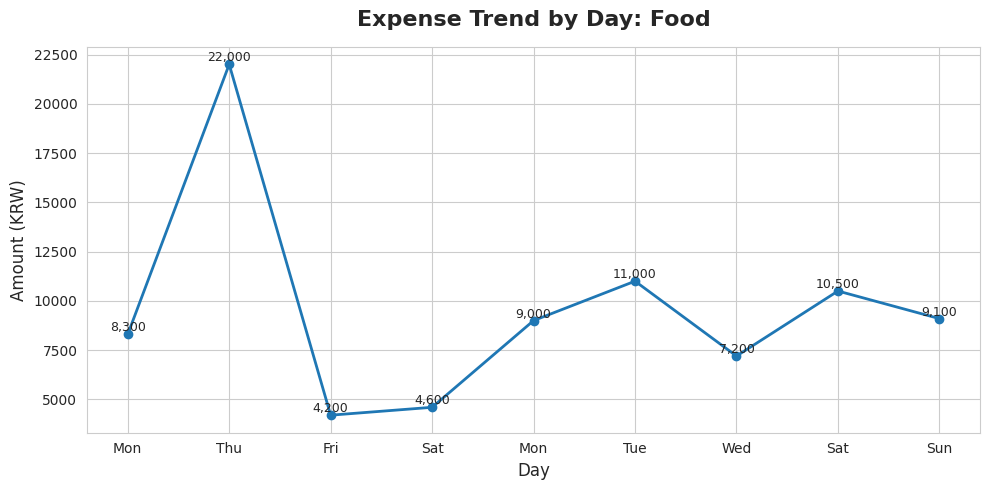

-> Graph for 'Food' generated.


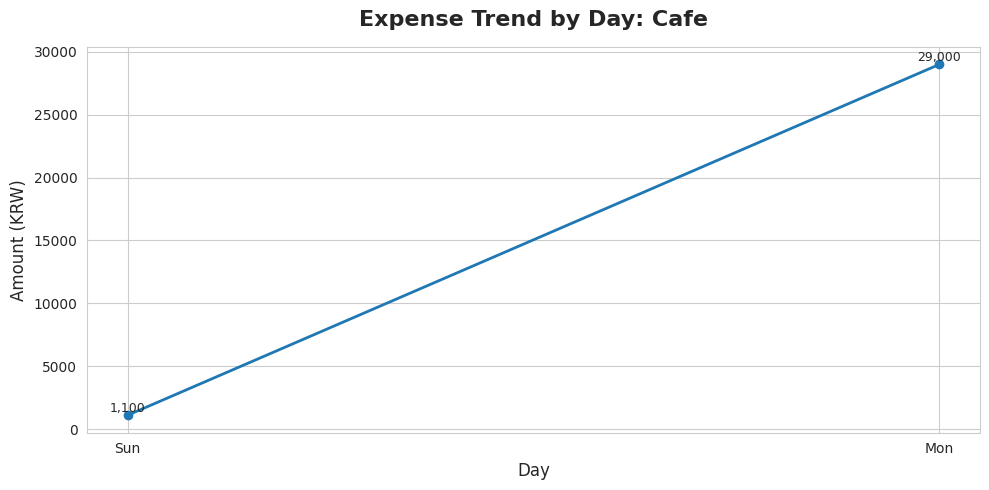

-> Graph for 'Cafe' generated.


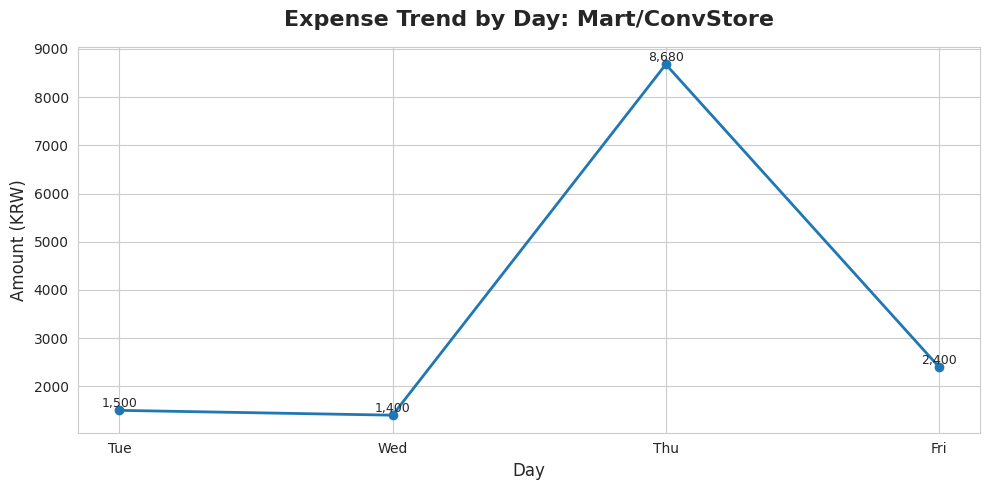

-> Graph for 'Mart/ConvStore' generated.


In [7]:
# -*- coding: utf-8 -*-

"""
[Machine Learning Assignment - Line Chart with Days]
* Description:
  - Loads 'receipts.csv'.
  - Merges '식비' and '식당' into 'Food'.
  - Translates categories to English.
  - Automatically assigns 'Mon', 'Tue', ... 'Sun' to data rows.
  - Plots Line Charts showing Amount trends by Day.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==========================================
# 1. File Upload
# ==========================================
print("1. Please upload your 'receipts.csv' file.")
from google.colab import files
uploaded = files.upload()

if len(uploaded.keys()) > 0:
    filename = list(uploaded.keys())[0]
    print(f"\nFile '{filename}' loaded successfully.")
else:
    print("No file uploaded. Please run the code again.")
    filename = None

# ==========================================
# 2. Data Processing
# ==========================================
if filename:
    # Load Data
    try:
        df = pd.read_csv(filename, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(filename, encoding='cp949')

    # Strip whitespace
    df.columns = df.columns.str.strip()

    # --- Map 'created_at' to 'amount' ---
    # Based on your data, the price is in the 'created_at' column
    if 'created_at' in df.columns:
        df['amount'] = pd.to_numeric(df['created_at'], errors='coerce')
    else:
        # Fallback to 4th column if name differs
        df['amount'] = pd.to_numeric(df.iloc[:, 3], errors='coerce')

    if 'username' in df.columns:
        df['username'] = df['username'].astype(str).str.strip()

        # --- Translation & Merging ---
        translation_map = {
            '식비': 'Food',
            '식당': 'Food',  # Merge 식당 into Food
            '편의점/마트': 'Mart/ConvStore',
            '카페': 'Cafe',
            '교통': 'Transport',
            '쇼핑': 'Shopping',
            '기타': 'Others',
            '문화/여가': 'Culture/Leisure',
            '의료/건강': 'Medical/Health',
            '술/유흥': 'Entertainment/Bar',
            '생활': 'Living',
            '뷰티': 'Beauty',
            '패션/잡화': 'Fashion',
            '여행/숙박': 'Travel',
            '교육': 'Education',
            '경조사/회비': 'Events/Dues'
        }

        df['category_eng'] = df['username'].map(translation_map).fillna('Others')

        # --- [KEY STEP] Assign Days (Mon-Sun) ---
        # Since there are no dates, we assign days sequentially to simulate a timeline
        days_cycle = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

        # Assign these days repeatedly to the dataframe
        df['day_name'] = np.tile(days_cycle, len(df) // 7 + 1)[:len(df)]

        # ==========================================
        # 3. Plotting Line Charts
        # ==========================================
        print("\nGenerating Line Charts by Day...")

        # Get list of unique categories
        categories = df['category_eng'].unique()

        # Sort categories: Ensure 'Food' is first
        categories = sorted(categories)
        if 'Food' in categories:
            categories.remove('Food')
            categories.insert(0, 'Food')

        for category in categories:
            # Filter data for specific category
            subset = df[df['category_eng'] == category].reset_index(drop=True)

            if subset.empty or subset['amount'].isnull().all():
                continue

            # Plot Setup
            plt.figure(figsize=(10, 5))
            sns.set_style("whitegrid")

            # Line Plot
            # X-axis will be the index (0, 1, 2...) but labeled with Days
            plt.plot(subset.index, subset['amount'], marker='o', linestyle='-', linewidth=2, markersize=6)

            # Set X-ticks to show Day Names (Mon, Tue...)
            # Note: If there are many points, labels might repeat (e.g. Mon, Tue... Mon, Tue...)
            plt.xticks(ticks=subset.index, labels=subset['day_name'])

            # Titles and Labels (English)
            plt.title(f'Expense Trend by Day: {category}', fontsize=16, fontweight='bold', pad=15)
            plt.xlabel('Day', fontsize=12)
            plt.ylabel('Amount (KRW)', fontsize=12)

            # Add values on top of points
            if len(subset) < 20:
                for i, val in enumerate(subset['amount']):
                    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=9)

            plt.tight_layout()
            plt.show()
            print(f"-> Graph for '{category}' generated.")

    else:
        print("Error: 'username' column not found.")

지출 순위 카테고리별 막대그래프

1. Please upload your 'receipts.csv' file.


Saving receipts.csv to receipts (10).csv

File 'receipts (10).csv' loaded successfully.

Generating Total Expenditure Ranking Graph...


/tmp/ipython-input-3147015067.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total Amount', y='Category', data=rank_df, palette='viridis')


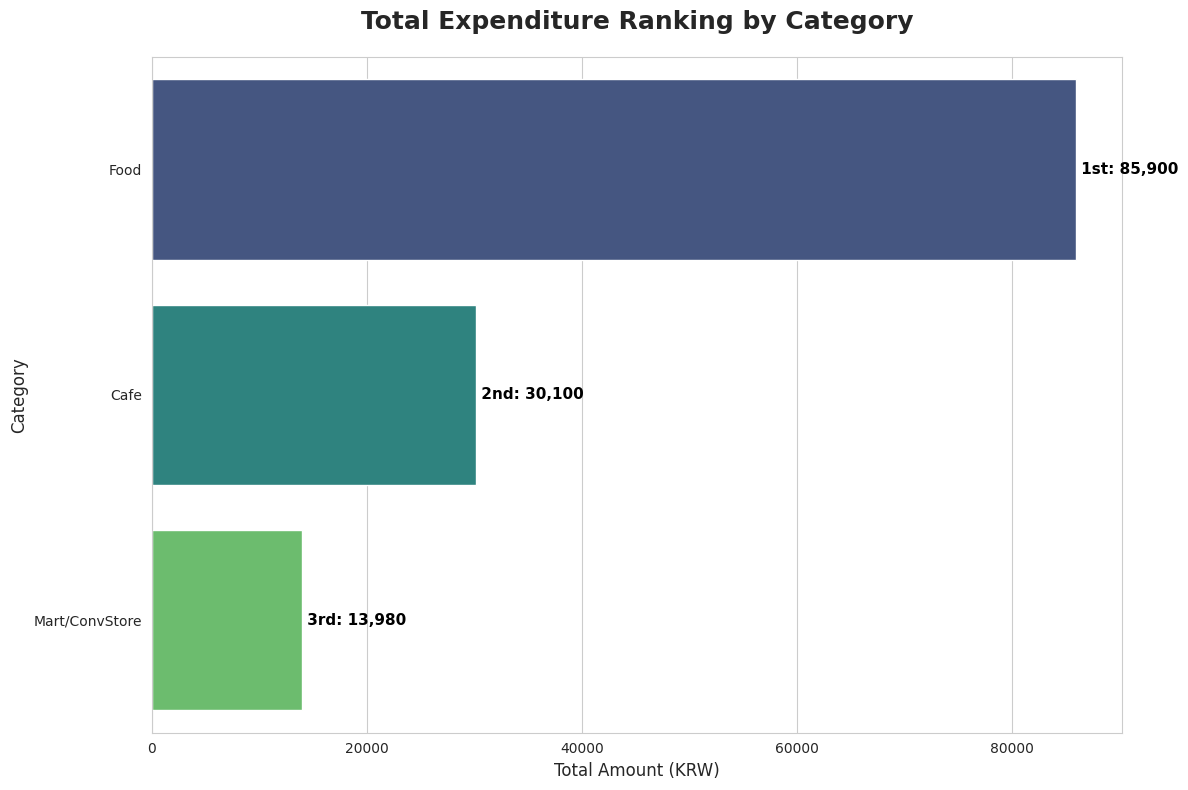

-> Ranking Graph generated successfully.


In [9]:
# -*- coding: utf-8 -*-

"""
[Machine Learning Assignment - Expenditure Ranking Only]
* Description:
  - Loads 'receipts.csv'.
  - Merges '식비' & '식당' -> 'Food'.
  - Translates categories to English.
  - Visualizes ONLY the Total Expenditure Ranking by Category (Bar Chart).
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. File Upload
# ==========================================
print("1. Please upload your 'receipts.csv' file.")
from google.colab import files
uploaded = files.upload()

if len(uploaded.keys()) > 0:
    filename = list(uploaded.keys())[0]
    print(f"\nFile '{filename}' loaded successfully.")
else:
    print("No file uploaded. Please run the code again.")
    filename = None

# ==========================================
# 2. Data Processing (Essential for Graph)
# ==========================================
if filename:
    # Load Data
    try:
        df = pd.read_csv(filename, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(filename, encoding='cp949')

    # Strip whitespace
    df.columns = df.columns.str.strip()

    # Map 'created_at' (or 4th col) to 'amount'
    if 'created_at' in df.columns:
        df['amount'] = pd.to_numeric(df['created_at'], errors='coerce')
    else:
        df['amount'] = pd.to_numeric(df.iloc[:, 3], errors='coerce')

    if 'username' in df.columns:
        df['username'] = df['username'].astype(str).str.strip()

        # Translation & Merging Dictionary
        translation_map = {
            '식비': 'Food',
            '식당': 'Food',  # Merge
            '편의점/마트': 'Mart/ConvStore',
            '카페': 'Cafe',
            '교통': 'Transport',
            '쇼핑': 'Shopping',
            '기타': 'Others',
            '문화/여가': 'Culture/Leisure',
            '의료/건강': 'Medical/Health',
            '술/유흥': 'Entertainment/Bar',
            '생활': 'Living',
            '뷰티': 'Beauty',
            '패션/잡화': 'Fashion',
            '여행/숙박': 'Travel',
            '교육': 'Education',
            '경조사/회비': 'Events/Dues'
        }

        # Apply Translation
        df['category_eng'] = df['username'].map(translation_map).fillna('Others')

        # ==========================================
        # 3. Plotting Rank Bar Chart Only
        # ==========================================
        print("\nGenerating Total Expenditure Ranking Graph...")

        # 1. Calculate Sum per Category & Sort Descending
        total_expense = df.groupby('category_eng')['amount'].sum().sort_values(ascending=False)

        # 2. Prepare Dataframe for Seaborn
        rank_df = total_expense.reset_index()
        rank_df.columns = ['Category', 'Total Amount']

        # 3. Plot Setup
        plt.figure(figsize=(12, 8))
        sns.set_style("whitegrid")

        # 4. Draw Horizontal Bar Chart
        ax = sns.barplot(x='Total Amount', y='Category', data=rank_df, palette='viridis')

        # 5. Titles & Labels
        plt.title('Total Expenditure Ranking by Category', fontsize=18, fontweight='bold', pad=20)
        plt.xlabel('Total Amount (KRW)', fontsize=12)
        plt.ylabel('Category', fontsize=12)

        # 6. Add Text Labels (Rank & Amount)
        for i, (value, name) in enumerate(zip(rank_df['Total Amount'], rank_df['Category'])):
            # Determine Rank Suffix (1st, 2nd, 3rd...)
            if i == 0: rank_str = "1st"
            elif i == 1: rank_str = "2nd"
            elif i == 2: rank_str = "3rd"
            else: rank_str = f"{i+1}th"

            # Format Text: "1st: 150,000"
            label_text = f" {rank_str}: {int(value):,}"

            # Place text next to the bar
            ax.text(value, i, label_text, va='center', fontsize=11, fontweight='bold', color='black')

        plt.tight_layout()
        plt.show()
        print("-> Ranking Graph generated successfully.")

    else:
        print("Error: 'username' column not found.")